In [172]:
import statsmodels.formula.api as smf
import pandas as pd

### three df: artists, tracks, and comments.

tracks_df = pd.read_csv("Tracks-and-Beats-Full.csv")
artists_df = pd.read_csv("Artists-Full.csv")
comments_df = pd.read_csv("Comments-Full.csv")



In [173]:
# from the tracks dataframe, we are interested in predicting: Likes, CommentsCount, Shares, Plays
# hypothesized predictors are: ArtistName (categorical), ArtistFollowers, BPM, Key (cat), ReleaseYear, Mix (cat), Genre (cat), Label (cat), Length (not linear?)
print(tracks_df.info())
print(tracks_df['ArtistName'].value_counts())
tracks_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TrackName          1069 non-null   object 
 1   TrackURL           1069 non-null   object 
 2   ArtistName         1069 non-null   object 
 3   TrackDescription   468 non-null    object 
 4   Likes              1023 non-null   float64
 5   CommentsCount      1069 non-null   int64  
 6   Shares             958 non-null    float64
 7   Plays              1023 non-null   float64
 8   TrackImageURL      1068 non-null   object 
 9   TrackDateTime      0 non-null      float64
 10  Tags               0 non-null      float64
 11  BPM                432 non-null    float64
 12  Key                432 non-null    object 
 13  Genre              432 non-null    object 
 14  Waveform           432 non-null    object 
 15  Length             432 non-null    object 
 16  IsTrack            432 n

,TrackName,TrackURL,ArtistName,TrackDescription,Likes,CommentsCount,Shares,Plays,TrackImageURL,TrackDateTime,...,IsTrack,Mix,Feat,Remixer,OriginalProducer,TrackDate,BeatportURL,BeatportTrackName,Label,BeatportRelease
0,@ Exit Festival 2018,https://soundcloud.com/nina-kraviz/exit-festiv...,Nina Kraviz,my closing set at Exit Festival 2018.\r\nwatch...,1678.0,89,183.0,25640.0,https://i1.sndcdn.com/artworks-ocJocQyqkx5RyPv...,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-01-27T17:21:47.000Z,NaN,NaN,NaN,NaN
1,New Year’s Eve Dj set - POLARIS x VERBIER,https://soundcloud.com/nina-kraviz/new-years-e...,Nina Kraviz,watch the stream here: www.youtube.com/watch?v...,1768.0,80,215.0,27043.0,https://i1.sndcdn.com/artworks-wmtcWRH7HcNGw7H...,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-01-02T01:54:03.000Z,NaN,NaN,NaN,NaN
2,mix from the Bedouin oasis desert,https://soundcloud.com/nina-kraviz/mix-from-th...,Nina Kraviz,NaN,2074.0,158,243.0,31136.0,https://i1.sndcdn.com/artworks-CN5i0S2uCepBvnT...,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-12-12T22:16:03.000Z,NaN,NaN,NaN,NaN
3,I'm Week (Mixed),https://soundcloud.com/nina-kraviz/im-week-mixed,Nina Kraviz,NaN,252.0,6,36.0,4941.0,https://i1.sndcdn.com/artworks-Wdosvy3rwkqH-0-...,NaN,...,Track,MIXED,Special Request,NaN,Nina Kraviz,2020-11-27T00:00:00.000Z,https://www.beatport.com/track/im-week/14608470,I'm Week,Mixmag Records,11/27/2020
4,Mount Olympus set @Reworks festival,https://soundcloud.com/nina-kraviz/nina-mt-oly...,Nina Kraviz,NaN,3880.0,251,432.0,61726.0,https://i1.sndcdn.com/artworks-1Frqwx8e9vFM3JU...,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-10-01T17:43:12.000Z,NaN,NaN,NaN,NaN


In [174]:
tracks_df.head()

,TrackName,TrackURL,ArtistName,TrackDescription,Likes,CommentsCount,Shares,Plays,TrackImageURL,TrackDateTime,...,IsTrack,Mix,Feat,Remixer,OriginalProducer,TrackDate,BeatportURL,BeatportTrackName,Label,BeatportRelease
0,@ Exit Festival 2018,https://soundcloud.com/nina-kraviz/exit-festiv...,Nina Kraviz,my closing set at Exit Festival 2018.\r\nwatch...,1678.0,89,183.0,25640.0,https://i1.sndcdn.com/artworks-ocJocQyqkx5RyPv...,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-01-27T17:21:47.000Z,NaN,NaN,NaN,NaN
1,New Year’s Eve Dj set - POLARIS x VERBIER,https://soundcloud.com/nina-kraviz/new-years-e...,Nina Kraviz,watch the stream here: www.youtube.com/watch?v...,1768.0,80,215.0,27043.0,https://i1.sndcdn.com/artworks-wmtcWRH7HcNGw7H...,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-01-02T01:54:03.000Z,NaN,NaN,NaN,NaN
2,mix from the Bedouin oasis desert,https://soundcloud.com/nina-kraviz/mix-from-th...,Nina Kraviz,NaN,2074.0,158,243.0,31136.0,https://i1.sndcdn.com/artworks-CN5i0S2uCepBvnT...,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-12-12T22:16:03.000Z,NaN,NaN,NaN,NaN
3,I'm Week (Mixed),https://soundcloud.com/nina-kraviz/im-week-mixed,Nina Kraviz,NaN,252.0,6,36.0,4941.0,https://i1.sndcdn.com/artworks-Wdosvy3rwkqH-0-...,NaN,...,Track,MIXED,Special Request,NaN,Nina Kraviz,2020-11-27T00:00:00.000Z,https://www.beatport.com/track/im-week/14608470,I'm Week,Mixmag Records,11/27/2020
4,Mount Olympus set @Reworks festival,https://soundcloud.com/nina-kraviz/nina-mt-oly...,Nina Kraviz,NaN,3880.0,251,432.0,61726.0,https://i1.sndcdn.com/artworks-1Frqwx8e9vFM3JU...,NaN,...,NaN,NaN,NaN,NaN,NaN,2020-10-01T17:43:12.000Z,NaN,NaN,NaN,NaN


In [175]:
# selecting only rows that are tracks, not dj sets because these have beatport features
tracks_df['BPM'].value_counts()
tracks_only = tracks_df.dropna(axis=0, subset=['BPM'])
print(tracks_only.info())
tracks_only.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 3 to 854
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TrackName          432 non-null    object 
 1   TrackURL           432 non-null    object 
 2   ArtistName         432 non-null    object 
 3   TrackDescription   114 non-null    object 
 4   Likes              419 non-null    float64
 5   CommentsCount      432 non-null    int64  
 6   Shares             383 non-null    float64
 7   Plays              419 non-null    float64
 8   TrackImageURL      431 non-null    object 
 9   TrackDateTime      0 non-null      float64
 10  Tags               0 non-null      float64
 11  BPM                432 non-null    float64
 12  Key                432 non-null    object 
 13  Genre              432 non-null    object 
 14  Waveform           432 non-null    object 
 15  Length             432 non-null    object 
 16  IsTrack            432 non

,TrackName,TrackURL,ArtistName,TrackDescription,Likes,CommentsCount,Shares,Plays,TrackImageURL,TrackDateTime,...,IsTrack,Mix,Feat,Remixer,OriginalProducer,TrackDate,BeatportURL,BeatportTrackName,Label,BeatportRelease
3,I'm Week (Mixed),https://soundcloud.com/nina-kraviz/im-week-mixed,Nina Kraviz,NaN,252.0,6,36.0,4941.0,https://i1.sndcdn.com/artworks-Wdosvy3rwkqH-0-...,NaN,...,Track,MIXED,Special Request,NaN,Nina Kraviz,2020-11-27T00:00:00.000Z,https://www.beatport.com/track/im-week/14608470,I'm Week,Mixmag Records,11/27/2020
24,Okain's Scream (Sebo K Mix),https://soundcloud.com/nina-kraviz/okains-scre...,Nina Kraviz,NaN,18.0,0,3.0,267.0,https://i1.sndcdn.com/artworks-I77DcMfa5UZy-0-...,NaN,...,Track,SEBO K MIX,Special Request,NaN,Nina Kraviz,2017-06-16T00:00:00.000Z,https://www.beatport.com/track/okains-scream/7...,Okain's Scream,Tsuba,6/6/2016
25,Sónar Premiere: Nina Kraviz 'You Are Wrong' (P...,https://soundcloud.com/nina-kraviz/sonar-premi...,Nina Kraviz,Nina Kraviz presents an exclusive new edit for...,6523.0,90,923.0,203528.0,https://i1.sndcdn.com/artworks-000222959835-4a...,NaN,...,Track,ORIGINAL MIX,Special Request,NaN,Nina Kraviz,2017-05-17T12:26:19.000Z,https://www.beatport.com/track/you-are-wrong/9...,You Are Wrong,Trip,7/7/2017
26,Nina Kraviz - IMPRV (The Deviant Octopus EP),https://soundcloud.com/nina-kraviz/nina-kraviz...,Nina Kraviz,Nina Kraviz launches her трип (pronounced ‘tri...,24023.0,277,3161.0,846079.0,https://i1.sndcdn.com/artworks-000099682603-np...,NaN,...,Track,ORIGINAL MIX,Special Request,NaN,Nina Kraviz,2014-12-09T11:32:01.000Z,https://www.beatport.com/track/imprv/6047111,IMPRV,Trip,12/22/2014
31,Nina Kraviz - Ghetto Kraviz,https://soundcloud.com/nina-kraviz/ghettokraviz,Nina Kraviz,One of the most eagerly anticipated electronic...,38934.0,390,3946.0,1253565.0,https://i1.sndcdn.com/artworks-000019189729-nc...,NaN,...,Track,ORIGINAL MIX,Special Request,NaN,Nina Kraviz,2012-02-29T20:20:07.000Z,https://www.beatport.com/track/ghetto-kraviz/3...,Ghetto Kraviz,Rekids,2/27/2012


In [176]:
# Cleaning Null shares and plays cells
# casting likes, shares and plays to int
tracks_only['Likes'] = tracks_only['Likes'].fillna(0).astype(int)
tracks_only['Shares'] = tracks_only['Shares'].fillna(0).astype(int)
tracks_only['Plays'] = tracks_only['Plays'].fillna(0).astype(int)
tracks_only['BPM'] = tracks_only['BPM'].astype(int)
tracks_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 3 to 854
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TrackName          432 non-null    object 
 1   TrackURL           432 non-null    object 
 2   ArtistName         432 non-null    object 
 3   TrackDescription   114 non-null    object 
 4   Likes              432 non-null    int32  
 5   CommentsCount      432 non-null    int64  
 6   Shares             432 non-null    int32  
 7   Plays              432 non-null    int32  
 8   TrackImageURL      431 non-null    object 
 9   TrackDateTime      0 non-null      float64
 10  Tags               0 non-null      float64
 11  BPM                432 non-null    int32  
 12  Key                432 non-null    object 
 13  Genre              432 non-null    object 
 14  Waveform           432 non-null    object 
 15  Length             432 non-null    object 
 16  IsTrack            432 non

In [177]:
# dropping text features that need NLP
# drop original producers and feat artists?
tracks_only.drop(['TrackURL', 'TrackDescription', 'TrackImageURL', 'TrackDateTime', 'Tags', 'Waveform', 'IsTrack', 'Remixer', 'BeatportURL', 'BeatportTrackName', 'TrackName'], axis=1, inplace=True)


C:\Users\Federico\miniconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
tracks_only

,ArtistName,Likes,CommentsCount,Shares,Plays,BPM,Key,Genre,Length,Mix,Feat,OriginalProducer,TrackDate,Label,BeatportRelease
3,Nina Kraviz,252,6,36,4941,78,B♭ min,Techno (Peak Time / Driving),7:59,MIXED,Special Request,Nina Kraviz,2020-11-27T00:00:00.000Z,Mixmag Records,11/27/2020
24,Nina Kraviz,18,0,3,267,125,C min,Tech House,7:43,SEBO K MIX,Special Request,Nina Kraviz,2017-06-16T00:00:00.000Z,Tsuba,6/6/2016
25,Nina Kraviz,6523,90,923,203528,129,G min,Techno (Raw / Deep / Hypnotic),7:11,ORIGINAL MIX,Special Request,Nina Kraviz,2017-05-17T12:26:19.000Z,Trip,7/7/2017
26,Nina Kraviz,24023,277,3161,846079,129,A min,Techno (Raw / Deep / Hypnotic),6:32,ORIGINAL MIX,Special Request,Nina Kraviz,2014-12-09T11:32:01.000Z,Trip,12/22/2014
31,Nina Kraviz,38934,390,3946,1253565,120,G♭ min,Tech House,3:44,ORIGINAL MIX,Special Request,Nina Kraviz,2012-02-29T20:20:07.000Z,Rekids,2/27/2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,laurent garnier,40,0,3,3202,133,C♯ maj,House,7:15,2020 REMASTERED VERSION - LABORATOIRE MIX,Insaac Students,Laurent Garnier,2020-07-24T00:00:00.000Z,F Communications,7/24/2020
851,laurent garnier,16,1,1,2229,150,E min,House,4:38,2020 REMASTERED VERSION,Insaac Students,Laurent Garnier,2020-07-24T00:00:00.000Z,F Communications,7/24/2020
852,laurent garnier,16,0,3,2365,127,A min,House,4:50,2020 REMASTERED VERSION,Insaac Students,Laurent Garnier,2020-07-24T00:00:00.000Z,F Communications,7/24/2020
853,laurent garnier,15,1,1,1867,132,G♯ maj,House,8:36,2020 REMASTERED VERSION,Insaac Students,Laurent Garnier,2020-07-24T00:00:00.000Z,F Communications,7/24/2020


In [179]:
# Cleaning mix types to original, live/club, remix/edit
tracks_only['Mix'].value_counts()
tracks_only['Key'].value_counts()
tracks_only['Genre'].value_counts()
tracks_only['Label'].value_counts()
tracks_only['BeatportRelease'].value_counts()

9/20/2019     14
8/30/2013     14
9/4/2020      11
3/27/2020     11
12/1/2017     10
              ..
5/10/2019      1
4/11/2018      1
11/3/2017      1
12/12/2010     1
11/20/2020     1
Name: BeatportRelease, Length: 161, dtype: int64

In [180]:
# Finding the number of followers of each artist in the artists_df DF, creating new column in track_df
# tracks_only['ArtistFollowers'] = artists_df.loc[artists_df['ArtistName']==tracks_only['ArtistName'], 'Followers'] 
tracks_foll = pd.merge(left=tracks_only, right=artists_df[['ArtistName', 'Followers']], on='ArtistName')
tracks_foll['Followers'] = tracks_foll['Followers'].astype(int)

AttributeError: 'Series' object has no attribute 'ActiveEng'

In [181]:
tracks_foll.info()
tracks_foll['Followers'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 431
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ArtistName        432 non-null    object
 1   Likes             432 non-null    int32 
 2   CommentsCount     432 non-null    int64 
 3   Shares            432 non-null    int32 
 4   Plays             432 non-null    int32 
 5   BPM               432 non-null    int32 
 6   Key               432 non-null    object
 7   Genre             432 non-null    object
 8   Length            432 non-null    object
 9   Mix               432 non-null    object
 10  Feat              432 non-null    object
 11  OriginalProducer  432 non-null    object
 12  TrackDate         431 non-null    object
 13  Label             432 non-null    object
 14  BeatportRelease   432 non-null    object
 15  Followers         432 non-null    int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 48.9+ KB


37999      29
30497      27
403912     26
124239     26
154681     25
442374     23
355068     21
215907     21
44724      19
29971      18
21627      18
36072      18
22125      17
17113      17
70874      15
1072185    14
114951     13
94938      11
268983     11
100785     10
103673      9
16098       9
161         8
91686       7
412347      7
101066      6
48266       3
6183        1
57177       1
497903      1
61          1
Name: Followers, dtype: int64

In [182]:
# Extracting year of release - compare soundcloud and beatport releases
tracks_foll['Likes'] = tracks_foll['Likes'].astype(int)
tracks_foll['CommentsCount'] = tracks_foll['CommentsCount'].astype(int)
tracks_foll['Shares'] = tracks_foll['Shares'].astype(int)
tracks_foll['Plays'] = tracks_foll['Plays'].astype(int)
tracks_foll['BPM'] = tracks_foll['BPM'].astype(int)
tracks_foll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 431
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ArtistName        432 non-null    object
 1   Likes             432 non-null    int32 
 2   CommentsCount     432 non-null    int32 
 3   Shares            432 non-null    int32 
 4   Plays             432 non-null    int32 
 5   BPM               432 non-null    int32 
 6   Key               432 non-null    object
 7   Genre             432 non-null    object
 8   Length            432 non-null    object
 9   Mix               432 non-null    object
 10  Feat              432 non-null    object
 11  OriginalProducer  432 non-null    object
 12  TrackDate         431 non-null    object
 13  Label             432 non-null    object
 14  BeatportRelease   432 non-null    object
 15  Followers         432 non-null    int32 
dtypes: int32(6), object(10)
memory usage: 47.2+ KB


In [183]:
tracks_foll.drop('BeatportRelease', axis=1, inplace=True)


In [184]:
# converting SoundCloud release date to timestamp. Selecting only date, converting to datetime.
from datetime import datetime
tracks_foll['TrackDate'] = tracks_foll['TrackDate'].apply(lambda x: x.replace('T', ' '))
tracks_foll['TrackDate'] = tracks_foll['TrackDate'].apply(lambda x: x.replace('Z', ''))
tracks_foll['TrackDate']

AttributeError: 'float' object has no attribute 'replace'

In [185]:
import numpy as np
# tracks_foll['TS'] = tracks_foll.TrackDate.values.astype(np.int64) // 10 ** 9
tracks_foll['TS'] = tracks_foll['TrackDate'].apply(lambda x: pd.Timestamp(x))
tracks_foll['TS'] = tracks_foll['TS'].astype(np.int64)

In [186]:
tracks_foll['TS']

0      1606435200000000000
1      1497571200000000000
2      1495023979000000000
3      1418124721000000000
4      1330546807000000000
              ...         
427    1595548800000000000
428    1595548800000000000
429    1595548800000000000
430    1595548800000000000
431    1595548800000000000
Name: TS, Length: 432, dtype: int64

In [187]:
# dropping old date column
tracks_foll.drop('TrackDate', axis=1, inplace=True)


In [188]:
tracks_foll.head()

,ArtistName,Likes,CommentsCount,Shares,Plays,BPM,Key,Genre,Length,Mix,Feat,OriginalProducer,Label,Followers,TS
0,Nina Kraviz,252,6,36,4941,78,B♭ min,Techno (Peak Time / Driving),7:59,MIXED,Special Request,Nina Kraviz,Mixmag Records,412347,1606435200000000000
1,Nina Kraviz,18,0,3,267,125,C min,Tech House,7:43,SEBO K MIX,Special Request,Nina Kraviz,Tsuba,412347,1497571200000000000
2,Nina Kraviz,6523,90,923,203528,129,G min,Techno (Raw / Deep / Hypnotic),7:11,ORIGINAL MIX,Special Request,Nina Kraviz,Trip,412347,1495023979000000000
3,Nina Kraviz,24023,277,3161,846079,129,A min,Techno (Raw / Deep / Hypnotic),6:32,ORIGINAL MIX,Special Request,Nina Kraviz,Trip,412347,1418124721000000000
4,Nina Kraviz,38934,390,3946,1253565,120,G♭ min,Tech House,3:44,ORIGINAL MIX,Special Request,Nina Kraviz,Rekids,412347,1330546807000000000


In [189]:
# converting length to seconds int
def time_convert(length):
    track_time_strings = length.split(":")
    track_time = int(track_time_strings[0]) * 60 + int(track_time_strings[1]) 
    return track_time

tracks_foll['Length'] = tracks_foll['Length'].apply(time_convert) 
          

In [190]:
tracks_foll['Length']

0      479
1      463
2      431
3      392
4      224
      ... 
427    435
428    278
429    290
430    516
431    660
Name: Length, Length: 432, dtype: int64

In [191]:
# def mix_class(string):
#     if 'original mix' or 'original' in lower(string):
#         return 'original mix'
#     else:
#         return 'remixed or reworked'

# tracks_foll['Mix'] = tracks_foll['Mix'].apply(mix_class)

# dropping mix features
tracks_foll.drop('Mix', axis=1, inplace=True)

In [192]:
tracks_foll

,ArtistName,Likes,CommentsCount,Shares,Plays,BPM,Key,Genre,Length,Feat,OriginalProducer,Label,Followers,TS
0,Nina Kraviz,252,6,36,4941,78,B♭ min,Techno (Peak Time / Driving),479,Special Request,Nina Kraviz,Mixmag Records,412347,1606435200000000000
1,Nina Kraviz,18,0,3,267,125,C min,Tech House,463,Special Request,Nina Kraviz,Tsuba,412347,1497571200000000000
2,Nina Kraviz,6523,90,923,203528,129,G min,Techno (Raw / Deep / Hypnotic),431,Special Request,Nina Kraviz,Trip,412347,1495023979000000000
3,Nina Kraviz,24023,277,3161,846079,129,A min,Techno (Raw / Deep / Hypnotic),392,Special Request,Nina Kraviz,Trip,412347,1418124721000000000
4,Nina Kraviz,38934,390,3946,1253565,120,G♭ min,Tech House,224,Special Request,Nina Kraviz,Rekids,412347,1330546807000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,laurent garnier,40,0,3,3202,133,C♯ maj,House,435,Insaac Students,Laurent Garnier,F Communications,268983,1595548800000000000
428,laurent garnier,16,1,1,2229,150,E min,House,278,Insaac Students,Laurent Garnier,F Communications,268983,1595548800000000000
429,laurent garnier,16,0,3,2365,127,A min,House,290,Insaac Students,Laurent Garnier,F Communications,268983,1595548800000000000
430,laurent garnier,15,1,1,1867,132,G♯ maj,House,516,Insaac Students,Laurent Garnier,F Communications,268983,1595548800000000000


In [193]:
# Creating an active engagement column: comments/plays
tracks_foll['ActiveEng'] = tracks_foll['CommentsCount']/tracks_foll['Plays']

In [194]:
#dropping invalid rows (NaN and inf)
# tracks_foll.replace(np.inf, np.nan)
with pd.option_context('mode.use_inf_as_na', True):
    tracks_foll = tracks_foll.dropna(axis=0, subset=['ActiveEng'])
tracks_foll.info()

# tracks_foll['ActiveEng'] = tracks_foll['ActiveEng'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 431
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArtistName        419 non-null    object 
 1   Likes             419 non-null    int32  
 2   CommentsCount     419 non-null    int32  
 3   Shares            419 non-null    int32  
 4   Plays             419 non-null    int32  
 5   BPM               419 non-null    int32  
 6   Key               419 non-null    object 
 7   Genre             419 non-null    object 
 8   Length            419 non-null    int64  
 9   Feat              419 non-null    object 
 10  OriginalProducer  419 non-null    object 
 11  Label             419 non-null    object 
 12  Followers         419 non-null    int32  
 13  TS                419 non-null    int64  
 14  ActiveEng         419 non-null    float64
dtypes: float64(1), int32(6), int64(2), object(6)
memory usage: 42.6+ KB


In [197]:
tracks_foll = tracks_foll[tracks_foll.ActiveEng != 0]
tracks_foll['ActiveEng'].value_counts()

0.000759    2
0.004184    2
0.002041    2
0.000371    1
0.000645    1
           ..
0.006623    1
0.001742    1
0.000537    1
0.000087    1
0.000449    1
Name: ActiveEng, Length: 326, dtype: int64

In [198]:
tracks_foll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 431
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArtistName        329 non-null    object 
 1   Likes             329 non-null    int32  
 2   CommentsCount     329 non-null    int32  
 3   Shares            329 non-null    int32  
 4   Plays             329 non-null    int32  
 5   BPM               329 non-null    int32  
 6   Key               329 non-null    object 
 7   Genre             329 non-null    object 
 8   Length            329 non-null    int64  
 9   Feat              329 non-null    object 
 10  OriginalProducer  329 non-null    object 
 11  Label             329 non-null    object 
 12  Followers         329 non-null    int32  
 13  TS                329 non-null    int64  
 14  ActiveEng         329 non-null    float64
dtypes: float64(1), int32(6), int64(2), object(6)
memory usage: 33.4+ KB


In [199]:
tracks_foll

,ArtistName,Likes,CommentsCount,Shares,Plays,BPM,Key,Genre,Length,Feat,OriginalProducer,Label,Followers,TS,ActiveEng
0,Nina Kraviz,252,6,36,4941,78,B♭ min,Techno (Peak Time / Driving),479,Special Request,Nina Kraviz,Mixmag Records,412347,1606435200000000000,0.001214
2,Nina Kraviz,6523,90,923,203528,129,G min,Techno (Raw / Deep / Hypnotic),431,Special Request,Nina Kraviz,Trip,412347,1495023979000000000,0.000442
3,Nina Kraviz,24023,277,3161,846079,129,A min,Techno (Raw / Deep / Hypnotic),392,Special Request,Nina Kraviz,Trip,412347,1418124721000000000,0.000327
4,Nina Kraviz,38934,390,3946,1253565,120,G♭ min,Tech House,224,Special Request,Nina Kraviz,Rekids,412347,1330546807000000000,0.000311
5,Nina Kraviz,10185,79,1121,1405957,151,A min,Deep House,500,Special Request,Nina Kraviz,Rekids,412347,1330546762000000000,0.000056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,red axes,32,2,2,866,123,A maj,Indie Dance,425,Insaac Students,Red Axes,K7 Records,48266,1611137427000000000,0.002309
425,laurent garnier,13,1,0,904,98,D min,Electronica,263,Insaac Students,Laurent Garnier,BONNE PIOCHE MUSIC,268983,1601337600000000000,0.001106
428,laurent garnier,16,1,1,2229,150,E min,House,278,Insaac Students,Laurent Garnier,F Communications,268983,1595548800000000000,0.000449
430,laurent garnier,15,1,1,1867,132,G♯ maj,House,516,Insaac Students,Laurent Garnier,F Communications,268983,1595548800000000000,0.000536


In [200]:
# visualising cross correlations of numerical values for potential collinearities
import plotly.express as px
px.imshow(tracks_foll.corr())

In [201]:
tracks_foll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 431
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArtistName        329 non-null    object 
 1   Likes             329 non-null    int32  
 2   CommentsCount     329 non-null    int32  
 3   Shares            329 non-null    int32  
 4   Plays             329 non-null    int32  
 5   BPM               329 non-null    int32  
 6   Key               329 non-null    object 
 7   Genre             329 non-null    object 
 8   Length            329 non-null    int64  
 9   Feat              329 non-null    object 
 10  OriginalProducer  329 non-null    object 
 11  Label             329 non-null    object 
 12  Followers         329 non-null    int32  
 13  TS                329 non-null    int64  
 14  ActiveEng         329 non-null    float64
dtypes: float64(1), int32(6), int64(2), object(6)
memory usage: 33.4+ KB


<AxesSubplot:>

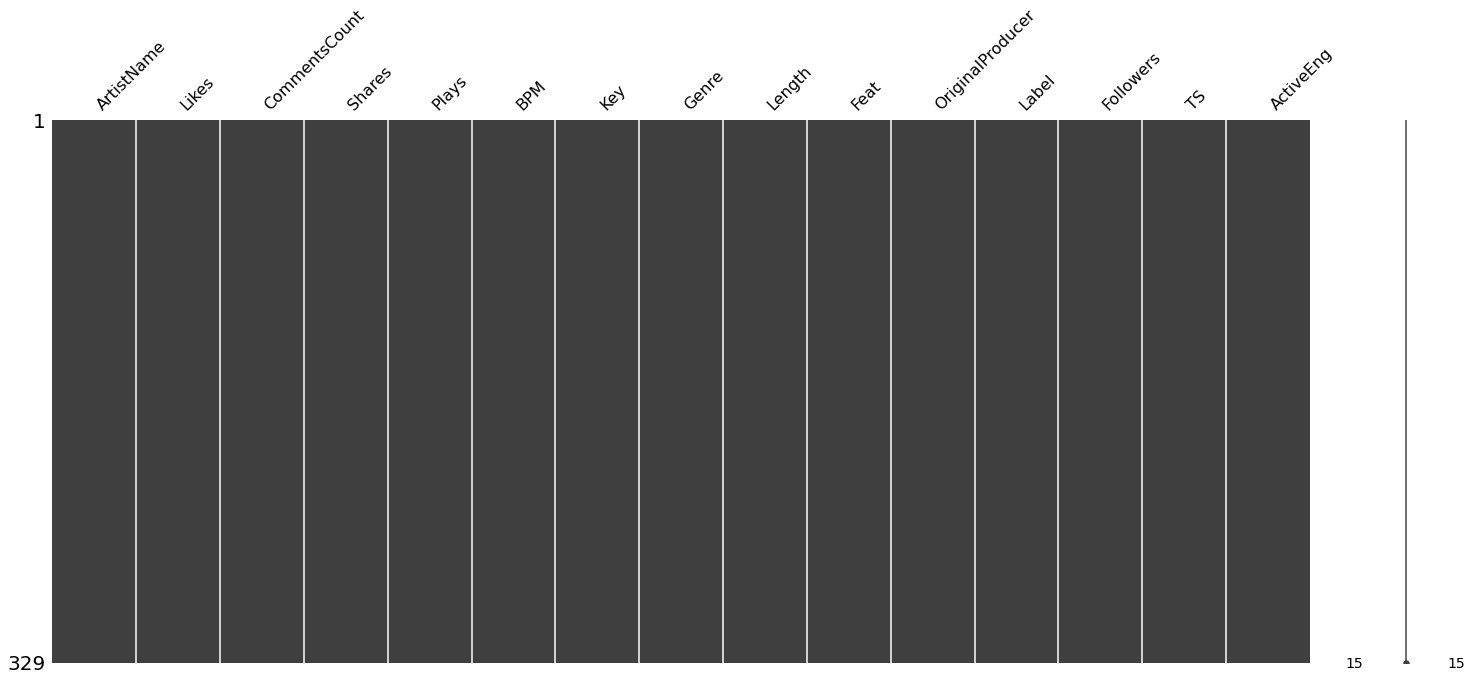

In [202]:
import missingno as msno
msno.matrix(tracks_foll)

In [203]:
# getting all columns for baseline model
formula = 'ActiveEng ~ ' + ' + '.join(tracks_foll.columns.drop(['ActiveEng', 'CommentsCount', 'Plays']))
print(formula)

ActiveEng ~ ArtistName + Likes + Shares + BPM + Key + Genre + Length + Feat + OriginalProducer + Label + Followers + TS


In [279]:
model_bas = smf.ols(formula, data=tracks_foll).fit()
display(model_bas.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ActiveEng   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     21.04
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           6.43e-06
Time:                        17:23:33   Log-Likelihood:                 1677.2
No. Observations:                 329   AIC:                            -3350.
Df Residuals:                     327   BIC:                            -3343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                     -1.478e-11   9.45e-12     -1.564      0.119   -3.34e-11    3.81e-12
ArtistName[T.Nina Kraviz]                      5.517e-10   3.53e-10      1.565      0.119   -1.42e-10    1.25e-09
ArtistName[T.Richie Hawtin]                   -1.312e-12   8.38e-13     -1.565      0.119   -2.96e-12    3.37e-13
ArtistName[T.Tale of Us]                       1.946e-11   1.24e-11      1.564      0.119   -5.02e-12    4.39e-11
ArtistName[T.adam beyer]                      -5.558e-12   3.55e-12     -1.564      0.119   -1.25e-11    1.43e-12
ArtistName[T.aleksandir]                       -1.31e-14   8.42e-15     -1.555      0.121   -2.97e-14    3.47e-15
ArtistName[T.baltra]                          -7.002e-14   4.49e-14     -1.559      0.120   -1.58e-13    1.83e-14
ArtistName[T.daniel avery]                     1.278e-14   8.16e-15      1.566      0.118   -3.27e-15    2.88e-14
ArtistName[T.efdemin]                         -5.475e-16   4.38e-16     -1.250      0.212   -1.41e-15    3.14e-16
ArtistName[T.enrico sangiuliano]              -1.546e-14   9.91e-15     -1.561      0.120   -3.49e-14    4.03e-15
ArtistName[T.floating points]                 -2.403e-13   1.54e-13     -1.563      0.119   -5.43e-13    6.21e-14
ArtistName[T.harrison bdp]                    -5.477e-14   3.52e-14     -1.558      0.120   -1.24e-13    1.44e-14
ArtistName[T.ilario alicante]                  3.088e-15   1.96e-15      1.572      0.117   -7.75e-16    6.95e-15
ArtistName[T.kevin yost]                       5.569e-15   3.49e-15      1.593      0.112   -1.31e-15    1.24e-14
ArtistName[T.kink]                              5.04e-14   3.22e-14      1.566      0.118   -1.29e-14    1.14e-13
ArtistName[T.laurent garnier]                  4.626e-14   2.96e-14      1.563      0.119    -1.2e-14    1.04e-13
ArtistName[T.maceo plex]                       3.061e-13   1.96e-13      1.562      0.119   -7.95e-14    6.92e-13
ArtistName[T.mall grab]                       -2.982e-14   1.91e-14     -1.561      0.119   -6.74e-14    7.75e-15
ArtistName[T.marcel dettmann]                   4.41e-14   2.81e-14      1.567      0.118   -1.13e-14    9.95e-14
ArtistName[T.mathame]                         -4.025e-15   2.66e-15     -1.512      0.132   -9.26e-15    1.21e-15
ArtistName[T.mind against]                    -2.763e-14   1.77e-14     -1.560      0.120   -6.25e-14     7.2e-15
ArtistName[T.monika kruse]                       2.4e-14   1.53e-14      1.568      0.118   -6.12e-15    5.41e-14
ArtistName[T.mrsch]                           -4.463e-16   2.94e-16     -1.516      0.130   -1.03e-15    1.33e-16
ArtistName[T.pleasurekraft]                    6.006e-14   3.84e-14      1.563      0.119   -1.55e-14    1.36e-13
Artis

In [205]:
formula2 = 'ActiveEng ~ ' + ' + '.join(tracks_foll.columns.drop(['ActiveEng', 'CommentsCount', 'Plays', 'Label', 'Feat', 'OriginalProducer', 'ArtistName', 'Genre', 'Key', 'TS']))
print(formula2)

model2 = smf.ols(formula2, data=tracks_foll).fit()
display(model2.summary())

ActiveEng ~ Likes + Shares + BPM + Length + Followers


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ActiveEng   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     4.039
Date:                Tue, 06 Apr 2021   Prob (F-statistic):            0.00144
Time:                        16:17:14   Log-Likelihood:                 1676.9
No. Observations:                 329   AIC:                            -3342.
Df Residuals:                     323   BIC:                            -3319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.001      2.607      0.010       0.000       0.003
Likes      -1.472e-07   7.72e-08     -1.907      0.057   -2.99e-07     4.7e-09
Shares      7.887e-07   5.25e-07      1.504      0.134   -2.43e-07    1.82e-06
BPM        -5.669e-07   5.18e-06     -0.109      0.913   -1.08e-05    9.63e-06
Length     -5.272e-07   4.09e-07     -1.289      0.198   -1.33e-06    2.78e-07
Followers  -1.159e-09   3.98e-10     -2.917      0.004   -1.94e-09   -3.77e-10
==============================================================================
Omnibus:                      247.534   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3073.483
Skew:                           3.102   Prob(JB):                         0.00
Kurtosis:                      16.628   Cond. No.                     2.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
# getting all columns for baseline model
formula3 = 'CommentsCount ~ ' + ' + '.join(tracks_foll.columns.drop(['ActiveEng', 'CommentsCount', 'Plays', 'Label', 'Feat', 'OriginalProducer', 'ArtistName', 'Likes', 'Shares', 'TS', 'Followers']))
print(formula3)

model3 = smf.ols(formula3, data=tracks_foll).fit()
display(model3.summary())

CommentsCount ~ BPM + Key + Genre + Length


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CommentsCount   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.587
Date:                Tue, 06 Apr 2021   Prob (F-statistic):            0.00994
Time:                        15:07:22   Log-Likelihood:                -2262.3
No. Observations:                 419   AIC:                             4625.
Df Residuals:                     369   BIC:                             4827.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       -55.5136     72.920     -0.761      0.447    -198.905      87.878
Key[T.A min]                                     13.5437     15.377      0.881      0.379     -16.695      43.782
Key[T.A♭ maj]                                   -19.7401     24.482     -0.806      0.421     -67.882      28.401
Key[T.A♭ min]                                    29.2047     21.835      1.338      0.182     -13.732      72.141
Key[T.A♯ maj]                                   -15.0348     31.667     -0.475      0.635     -77.305      47.235
Key[T.A♯ min]                                   -21.9229     26.846     -0.817      0.415     -74.713      30.867
Key[T.B maj]                                    -19.4337     31.636     -0.614      0.539     -81.644      42.776
Key[T.B min]                                    -13.4632     18.228     -0.739      0.461     -49.308      22.381
Key[T.B♭ maj]                                    63.5179     27.505      2.309      0.021       9.432     117.604
Key[T.B♭ min]                                    68.3169     22.752      3.003      0.003      23.577     113.057
Key[T.C maj]                                    -12.9088     17.720     -0.728      0.467     -47.753      21.936
Key[T.C min]                                    -17.8335     16.866     -1.057      0.291     -50.999      15.333
Key[T.C♯ maj]                                   -29.0832     35.743     -0.814      0.416     -99.370      41.203
Key[T.C♯ min]                                   -39.5348     32.208     -1.228      0.220    -102.868      23.799
Key[T.D maj]                                    -20.8026     22.261     -0.934      0.351     -64.577      22.972
Key[T.D min]                                    -18.9993     19.143     -0.992      0.322     -56.643      18.644
Key[T.D♭ maj]                                    10.4595     28.945      0.361      0.718     -46.458      67.377
Key[T.D♭ min]                                    44.8184     21.206      2.113      0.035       3.118      86.518
Key[T.D♯ maj]                                   -25.7309     32.340     -0.796      0.427     -89.324      37.862
Key[T.D♯ min]                                   -24.1463     31.681     -0.762      0.446     -86.444      38.151
Key[T.E maj]                                    -16.0453     20.436     -0.785      0.433     -56.231      24.140
Key[T.E min]                                     -8.9645     18.901     -0.474      0.636     -46.132      28.203
Key[T.E♭ maj]                                    -7.6338     42.841     -0.178      0.859     -91.878      76.610
Key[T.E♭ min]                                   -17.6753     20.762     -0.851      0.395     -58.503      23.152
Key[T

In [281]:
# getting all columns for baseline model
formula4 = 'ActiveEng ~ ' + ' + '.join(tracks_foll.columns.drop(['ActiveEng', 'CommentsCount', 'Plays', 'Label', 'Feat', 'OriginalProducer', 'Likes', 'Shares', 'TS', 'Followers', 'BPM', 'Fitted']))
print(formula4)

model4 = smf.ols(formula4, data=tracks_foll).fit()
print(model4.summary())

ActiveEng ~ ArtistName + Key + Genre + Length
                            OLS Regression Results                            
Dep. Variable:              ActiveEng   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     8.233
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.77e-37
Time:                        17:27:07   Log-Likelihood:                 1870.2
No. Observations:                 329   AIC:                            -3588.
Df Residuals:                     253   BIC:                            -3300.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [207]:
## lots of insignificant categories...
# let's see the impact of categories with an anova
import statsmodels.api as sm
sm.stats.anova_lm(model4, typ=2)

,sum_sq,df,F,PR(>F)
ArtistName,0.000398,28.0,16.165655,1.005566e-41
Key,0.000036,33.0,1.231660,1.887642e-01
Genre,0.000020,13.0,1.761516,4.956734e-02
Length,0.000001,1.0,1.168767,2.806841e-01
Residual,0.000222,253.0,NaN,NaN


In [215]:
formula5 = 'ActiveEng ~ Genre + Key'

model5 = smf.ols(formula5, data=tracks_foll).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              ActiveEng   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.345
Date:                Tue, 06 Apr 2021   Prob (F-statistic):             0.0783
Time:                        16:19:44   Log-Likelihood:                 1699.6
No. Observations:                 329   AIC:                            -3305.
Df Residuals:                     282   BIC:                            -3127.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [216]:
sm.stats.anova_lm(model5, typ=2)

,sum_sq,df,F,PR(>F)
Genre,0.000049,13.0,1.695484,0.061335
Key,0.000072,33.0,0.982455,0.499600
Residual,0.000628,282.0,NaN,NaN


In [224]:
# popularity is all that matters?
model6 = smf.ols('ActiveEng ~ BPM*Key + ArtistName', data=tracks_foll).fit()
print(model6.summary())
sm.stats.anova_lm(model6, typ=2)

                            OLS Regression Results                            
Dep. Variable:              ActiveEng   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     6.816
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           9.74e-33
Time:                        16:24:45   Log-Likelihood:                 1878.4
No. Observations:                 329   AIC:                            -3573.
Df Residuals:                     237   BIC:                            -3224.
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

,sum_sq,df,F,PR(>F)
Key,4.001514e-05,33.0,1.358217,1.123290e-01
ArtistName,2.881379e-04,28.0,11.526595,1.526263e-30
BPM,4.223106e-07,1.0,0.473032,4.922681e-01
BPM:Key,3.168731e-05,33.0,1.075549,3.649670e-01
Residual,2.115873e-04,237.0,NaN,NaN


In [227]:
# popularity is all that matters?
model7 = smf.ols('ActiveEng ~ BPM*Key', data=tracks_foll).fit()
print(model7.summary())
sm.stats.anova_lm(model7, typ=2)

                            OLS Regression Results                            
Dep. Variable:              ActiveEng   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     2.236
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           5.15e-06
Time:                        16:26:56   Log-Likelihood:                 1737.1
No. Observations:                 329   AIC:                            -3346.
Df Residuals:                     265   BIC:                            -3103.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004      0.00

,sum_sq,df,F,PR(>F)
Key,9.816061e-05,33.0,1.577386,0.034367
BPM,3.493290e-09,1.0,0.001852,0.965702
BPM:Key,1.790526e-04,33.0,2.877274,0.000001
Residual,4.997252e-04,265.0,NaN,NaN


In [237]:
px.scatter(tracks_foll, "BPM", "ActiveEng", title="BPM vs active engagement") 


In [229]:
px.scatter(tracks_foll, "TS", "ActiveEng", title="TS vs active engagement") 


In [161]:
px.scatter(tracks_foll, "Key", "ActiveEng", title="Length vs active engagement") 


In [239]:
px.scatter(tracks_foll, "ArtistName", "ActiveEng", title="Artist vs active engagement") 


In [231]:
px.scatter(tracks_foll, "Key", "ActiveEng", title="Key vs active engagement") 


In [ ]:
# splitting data into train and test dataset
from sklearn.model_selection import train_test_split
X = tracks_foll
y = tracks_foll['CommentsCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:

import plotly.graph_objects as go

ice_df["fitted"] = model.fittedvalues

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ice_df["Year"], y=ice_df["Extent"], name="Year vs Sea Ice Extent (million sq km)", mode="markers"))
fig.add_trace(go.Scatter(
    x=ice_df["Year"], y=ice_df["fitted"], name="Fitted Regression Line"))
fig.update_layout(title="Regression line of Year vs Sea Ice Extent (million sq km)", xaxis_title="Year",
    yaxis_title="Sea Ice Extent")
fig.show()

In [235]:
tracks_foll["Fitted"] = model6.fittedvalues
px.scatter(tracks_foll, "BPM", "Fitted", color="Key", title="BPM vs predicted values. Coloured by Key")

<ipython-input-235-49a742f21a98>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [236]:
px.scatter(tracks_foll, "Key", "Fitted", color="BPM", title="Key vs predicted values. Coloured by BPM")

In [271]:
# splitting data into train and test dataset
from sklearn.model_selection import train_test_split
X = tracks_foll
y = tracks_foll['ActiveEng']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [272]:
X_train.shape, X_test.shape

((197, 16), (132, 16))

In [273]:
model_fin = smf.ols('ActiveEng ~ BPM*Key + ArtistName', data=X_train).fit()
print(model_fin.summary())

                            OLS Regression Results                            
Dep. Variable:              ActiveEng   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4.823
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.25e-14
Time:                        16:55:43   Log-Likelihood:                 1129.9
No. Observations:                 197   AIC:                            -2094.
Df Residuals:                     114   BIC:                            -1821.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [274]:
sm.stats.anova_lm(model_fin, typ=2)

C:\Users\Federico\miniconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 30, but rank is 27



,sum_sq,df,F,PR(>F)
Key,2.656696e-05,30.0,0.839758,6.920344e-01
ArtistName,1.547381e-04,25.0,5.869360,1.947672e-11
BPM,6.023336e-08,1.0,0.057118,8.115401e-01
BPM:Key,4.092495e-05,30.0,1.293601,1.681070e-01
Residual,1.202186e-04,114.0,NaN,NaN


In [275]:
predictions = model_fin.predict(X_test)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 'F♯ maj' does not match any of the expected levels (expected: ['A maj', 'A min', ..., 'G♯ maj', 'G♯ min'])
    ActiveEng ~ BPM*Key + ArtistName
                    ^^^

In [276]:
model_fin2 = smf.ols('ActiveEng ~ Genre + Length', data=X_train).fit()
print(model_fin2.summary())

# doesn't work with artists as some have no tracks in the test dataset

                            OLS Regression Results                            
Dep. Variable:              ActiveEng   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.124
Date:                Tue, 06 Apr 2021   Prob (F-statistic):             0.0146
Time:                        16:56:30   Log-Likelihood:                 996.32
No. Observations:                 197   AIC:                            -1965.
Df Residuals:                     183   BIC:                            -1919.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [277]:
predictions = model_fin2.predict(X_test)
print(predictions)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 'Minimal / Deep Tech' does not match any of the expected levels (expected: ['Breaks / Breakbeat / UK Bass', 'Dance / Electro Pop', ..., 'Techno (Raw / Deep / Hypnotic)', 'UK Garage / Bassline'])
    ActiveEng ~ Genre + Length
                ^^^^^